# Algorithmes Génétiques

![alt text](pics/dna-Genetic-Algorithm_3.jpg "Algorithmes Génétiques")

*(source de l'image: [pixabay](https://pixabay.com/de/illustrations/dna-evolution-dinosaurier-roboter-3778639/))*

## Contexte

**ToDo: Explications AG - intro**

Let’s start with a few definitions, rephrased in the context of the TSP:
- Gene: a city (represented as (x, y) coordinates)
- Individual (aka “chromosome”): a single route satisfying the conditions above
- Population: a collection of possible routes (i.e., collection of individuals)
- Parents: two routes that are combined to create a new route
- Mating pool: a collection of parents that are used to create our next population (thus creating the next generation of routes)
- Fitness: a function that tells us how good each route is (in our case, how short the distance is)
- Mutation: a way to introduce variation in our population by randomly swapping two cities in a route
- Elitism: a way to carry the best individuals into the next generation

Structure de l'algorithme :

1. Create the population
2. Determine fitness
3. Select the mating pool
4. Breed
5. Mutate
6. Repeat

## Le problème du voyageur de commerce (*travelling salesman problem*)

Le problème du voyageur de commerce, ou *problème du commis voyageur*, est un problème d'optimisation qui consiste à déterminer, étant donné une liste de villes et les distances entre toutes les paires de villes, le plus court circuit qui passe par chaque ville une et une seule fois (source: [fr.wikipedia.org](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce)).

Les **règles** sont donc les suivantes :
1. Chaque ville doit être visitée exactement une fois
2. Le voyageur de commerce doit retourner à la ville de départ (la distance totale doit être calculée en conséquence !) 

![alt text](pics/TSP.png "Travelling salesman problem")

*(source de l'image: [physics.aps.org](https://physics.aps.org/articles/v10/s32))*

Il parait simple, non ?

Malgré la simplicité de l’énoncé, aujourd'hui **on ne connaît pas** d'algorithme permettant de trouver une solution exacte rapidement et qui fonctionne dans tous les cas !


**GOAL:** utiliser une algorithme génétique per trouver une bonne solution au problème !


## Getting started

### Importantion des outils

Nous commençons par importer les outils qui nous aideront à implémenter notre algorithme génétique

In [2]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

Pour les plus curieux :
- **numpy** nous aidera à faire les calcules
- **pandas** à stocker les données
- **matplotlib** à afficher les résultats


### Définition de la structure des données

Comme nous devons trouver l’itinéraire le plus court entre une liste de villes, nous devons pouvoir garder cette information et connaitre la distance entre les Villles. Ceci est fait grâce à la classe `City` ci-dessous.

**Exercice** : Complétez le code pour calculer la distance entre deux villes.

In [3]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        # ToDo: à  completer !! (1 ligne de code)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

----
**Cellule de TEST**:  Si votre code fonctionne, la prochaine cellule devrait afficher **10.0**

In [4]:
test_City_A = City(10, 100)
test_City_B = City(16, 92)
dist_test = test_City_A.distance(test_City_B)
print("La distance entre les deux villes de test vaut :", dist_test)

La distance entre les deux villes de test vaut : 10.0


<details>
    <summary>Suggestion 1</summary>
1. En python, <code>**</code>  est l'operateur puissance (exemple : <code>x = 3 ** 2</code> -> x vaut 9)
</details>

<details>
    <summary>Suggestion 2</summary>
2. utilisez la fonction <code>np.sqrt(number)</code> pour calculer la racine carrée
</details>

<details>
    <summary>Suggestion 3</summary>
3. Théorème de Pythagore...
</details>

-

*donnez-vous votre langue au chat?* 👅🐱

<details>
    <summary>Solution</summary>
<code>distance = np.sqrt((xDis ** 2) + (yDis ** 2))</code>
</details>

---

## Fitness 💪

Nous devons être en mesure de comparer des solutions pour reconnaitre les bonnes de moins bonnes. Ceci est fait grâce à la classe `Fitness`.

Dans notre cas, nous traiterons la fitness comme *l'inverse de la distance* de l'itinéraire.
Nous voulons minimiser la distance de l'itinéraire ! Donc un score de fitness plus élevé est préférable !

Rappel: sur la base de la règle n° 2 (voir section "**Le Problème**"), nous devons commencer et finir dans la même ville.Ce calcul supplémentaire est pris en compte à la ligne 13.

In [5]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

## Creation de la population

À cette étape nous devons définir notre « Population ». 

On peut voir une Population comme un ensemble de solutions possibles que, en évoluant au cours des générations, se rapprocheront toujours plus de la meilleure solution possible. 

Qu’est-ce que donc pour nous une "solution" ?

1. Une distance très petite
2. Une liste ordonnées des villes visitées (qui respecte les règles 1 et 2)
3. Aucune idée, mais c'est où le T-Rex ?

Clique sur `Réponse` ci-dessous pour valider votre choix
<details>
    <summary>Réponse</summary>
- [x] Une liste ordonnées des villes visité (qui respecte les règles 1 et 2)
</details>

**Exercice**: completez le code suivant pour créer un Itinéraire (route) qui à partire d'une liste de ville (le type n'est pas important) retourne une liste aleatoire

In [6]:
def createRoute(cityList):
    # ToDo: à  completer !!
    route = random.sample(cityList, len(cityList))
    return route

---
**Cellule de TEST**:  Si votre code fonctionne, la prochaine cellule devrait retourne une liste qui contienne **TOUTES** les villes dans un ordre aléatoire et sans répetitions

In [7]:
test_cityList = ["Brig", "Visp", "Sierre", "Sion", "Martigny", "LeResteDuMonde"]
test_route = createRoute(test_cityList)
print(test_route)

['Martigny', 'Sierre', 'Visp', 'Brig', 'Sion', 'LeResteDuMonde']


<details>
    <summary>Suggestion 1</summary>
investiguez la fonction `random.sample()`
</details>

<details>
    <summary>Suggestion 2</summary>
testez len(cityList)
</details>
-

*donnez-vous votre langue au chat?* 👅🐱

<details>
    <summary>Solution</summary>
route = random.sample(cityList, len(cityList))
</details>

---

In [8]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

Remarque : nous n'avons qu'à utiliser ces fonctions pour créer la population initiale. Les générations suivantes seront produites par *reproduction* et *mutation*.

## Determiner le "Fitness"

bla bla

In [9]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [10]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [11]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

## Crossover

bla bla

In [12]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [13]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

## Mutation

bla bla

In [14]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [15]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

## Repeat

bla bla

In [16]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

# Evolution !

bla bla

In [17]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [18]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [19]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 2126.166963427945
Final distance: 935.4778567426554


[(99,192),
 (153,194),
 (182,188),
 (197,121),
 (195,109),
 (128,131),
 (131,127),
 (133,120),
 (137,92),
 (90,80),
 (45,54),
 (8,51),
 (65,22),
 (85,0),
 (86,2),
 (151,29),
 (168,21),
 (175,44),
 (193,59),
 (181,82),
 (120,63),
 (60,119),
 (47,124),
 (44,162),
 (76,168)]

## Plot (Optional)

In [20]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

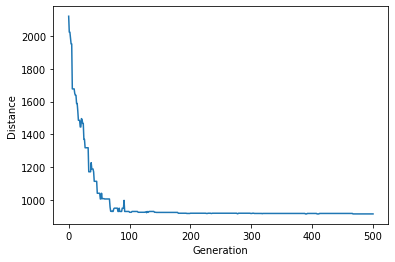

In [21]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

## References

1. Article original by [Eric Stoltz - Evolution of a salesman](https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35). Kudos to him!
2. Algorithmes génétiques - Wikipedia: [fr.wikipedia.org/wiki/Algorithme_génétique](https://fr.wikipedia.org/wiki/Algorithme_g%C3%A9n%C3%A9tique)
3. Problème du voyageur de commerce - Wikipedia: [fr.wikipedia.org/wiki/Problème_du_voyageur_de_commerce](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce)